In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def gen_mask(maskType, imgSize, masksize=0.25):
    # the larger the masksize, the bigger the mask
    image_shape = [imgSize, imgSize]
    if maskType == 'random':
        mask = np.ones(image_shape)
        mask[np.random.random(image_shape[:2]) < masksize] = 0.0
    elif maskType == 'center':
        center_scale = -(masksize - 1)/2 
        assert(center_scale <= 0.5)
        mask = np.ones(image_shape)
        l = int(imgSize*center_scale)
        u = int(imgSize*(1.0-center_scale))
        mask[l:u, l:u] = 0.0
    elif maskType == 'left':
        mask = np.ones(image_shape)
        c = imgSize #// 2
        masksize = 1 - masksize
        c = int(c * masksize)
        mask[:, c:] = 0.0
    elif maskType == 'bottom':
        mask = np.ones(image_shape)
        c = imgSize# // 2
        masksize = 1 - masksize 
        c = int(c * masksize)
        mask[c:, :] = 0.0
    else:
        assert(False)
    return mask

In [10]:
mask = gen_mask('center', 64, 0.3)
# mask = np.array([mask for i in range(args.batchsize)])
mask = mask.reshape([1, 64, 64])
mask = torch.tensor(mask, dtype=torch.float, requires_grad=False)


In [20]:
original = np.load('original.npy')

x_test = torch.from_numpy(original[0].transpose(2, 0, 1))
x_masked_test = x_test * mask

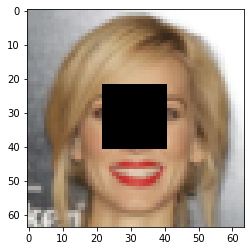

In [22]:
x_noisy = x_masked_test.data.numpy().transpose(1, 2, 0)
plt.imshow(x_noisy)

In [23]:
x_noisy_filled = x_test.clone().detach()
noise = np.random.normal(0, 0.2, x_noisy_filled.size())
noise = torch.tensor(noise,dtype=torch.float)
noise = noise * (1-mask)
x_noisy_filled = x_noisy_filled + noise
x_noisy_filled = torch.clamp(x_noisy_filled, 0, 1)

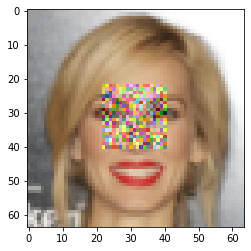

In [24]:
x_filled = x_noisy_filled.data.numpy().transpose(1, 2, 0)
plt.imshow(x_filled)

In [30]:
x_inverted_filled = x_test.clone().detach()
missing_x         = x_inverted_filled.clone()
missing_x         = missing_x.data.cpu().numpy()
missing_x         = missing_x[:,::-1,::-1]
missing_x         = torch.tensor(missing_x.copy(),dtype=torch.float)
missing_x         = (1-mask)*missing_x
x_inverted_filled = x_inverted_filled * mask
x_inverted_filled = x_inverted_filled + missing_x

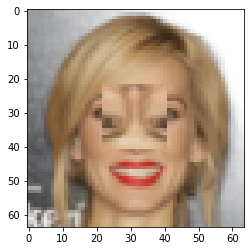

In [31]:
x_filled = x_inverted_filled.data.numpy().transpose(1, 2, 0)
plt.imshow(x_filled)

In [32]:
x_black_filled = x_test.clone().detach()
x_black_filled = mask * x_black_filled
x_black_filled = x_black_filled * mask


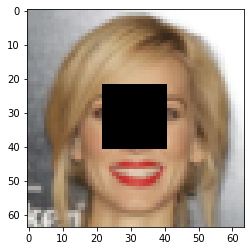

In [33]:
x_filled = x_black_filled.data.numpy().transpose(1, 2, 0)
plt.imshow(x_filled)

In [37]:
x_noisy_filled = x_test.clone().detach()
noise          = np.random.normal(0,0.2, x_noisy_filled.size())
noise          = torch.tensor(noise,dtype=torch.float)
noise          = noise * (1-mask)
x_noisy_filled = mask * x_noisy_filled + noise
x_noisy_filled = torch.clamp(x_noisy_filled, 0, 1)

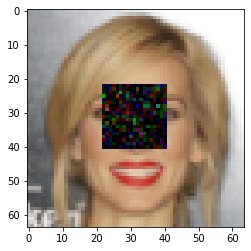

In [38]:
x_filled = x_noisy_filled.data.numpy().transpose(1, 2, 0)
plt.imshow(x_filled)

In [40]:
x_noisy  = x_test.clone().detach()
noise    = np.random.normal(0,0.05, x_noisy.size())
noise    = torch.tensor(noise,dtype=torch.float)
x_noisy  = x_noisy + noise
x_noisy  = torch.clamp(x_noisy, 0, 1)

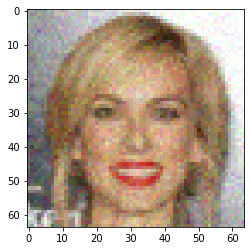

In [41]:
x_filled = x_noisy.data.numpy().transpose(1, 2, 0)
plt.imshow(x_filled)